<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow

In [ ]:
img_path = '/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 8/Source/j.png'

# Reading & Converting image to binary for Morphological Transformation
Source: https://python.plainenglish.io/image-dilation-explained-easily-e085c47fbac2

In [ ]:
def read_this(image_file):
  if(isinstance(image_file, str)):
    image_src = cv.imread(image_file, 0)
  else:
    image_src = image_file
  return image_src

def convert_binary(image_src, thresh_val):
    color_1 = 255
    color_2 = 0
    initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
    return final_conv

def binarize_this(image_file, thresh_val=127):
    image_src = read_this(image_file=image_file)
    image_b = convert_binary(image_src=image_src, thresh_val=thresh_val)
    return image_b

# Dilation manually
Source: https://python.plainenglish.io/image-dilation-explained-easily-e085c47fbac2

In [ ]:
def dilate_this(image_file, dilation_level=3, with_plot=False):
    # setting the dilation_level
    dilation_level = 3 if dilation_level < 3 else dilation_level
    
    # obtain the kernel by the shape of (dilation_level, dilation_level)
    structuring_kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)
    
    orig_shape = image_src.shape
    pad_width = dilation_level - 2
    
    # pad the image with pad_width
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
    
    # obtain the submatrices according to the size of the kernel
    flat_submatrices = np.array([
        image_pad[i:(i + dilation_level), j:(j + dilation_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])
    
    # replace the values either 255 or 0 by dilation condition
    image_dilate = np.array([255 if (i == structuring_kernel).any() else 0 for i in flat_submatrices])
    # obtain new matrix whose shape is equal to the original image size
    image_dilate = image_dilate.reshape(orig_shape)
    
    # plotting
    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Dilated - {}".format(dilation_level))
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_dilate, cmap=cmap_val)
        plt.show()
        return True
    return image_dilate

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

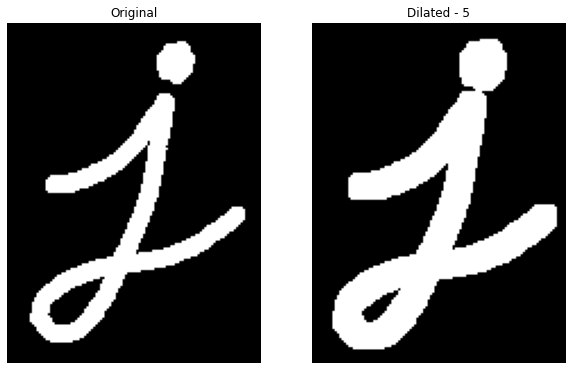

True

In [ ]:
dilate_this(image_file=img_path, dilation_level=5, with_plot=True)

# Erosion manually
Source: https://python.plainenglish.io/image-erosion-explained-in-depth-using-numpy-320c01b674a8

In [ ]:
def erode_this(image_file, erosion_level=3, with_plot=False):
    erosion_level = 3 if erosion_level < 3 else erosion_level

    structuring_kernel = np.full(shape=(erosion_level, erosion_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)

    orig_shape = image_src.shape
    pad_width = erosion_level - 2

    # pad the matrix with `pad_width`
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])

    # sub matrices of kernel size
    flat_submatrices = np.array([
        image_pad[i:(i + erosion_level), j:(j + erosion_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])

    # condition to replace the values - if the kernel equal to submatrix then 255 else 0
    image_erode = np.array([255 if (i == structuring_kernel).all() else 0 for i in flat_submatrices])
    image_erode = image_erode.reshape(orig_shape)

    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Eroded - {}".format(erosion_level))

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_erode, cmap=cmap_val)
        plt.show()
        return True
    return image_erode

4. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

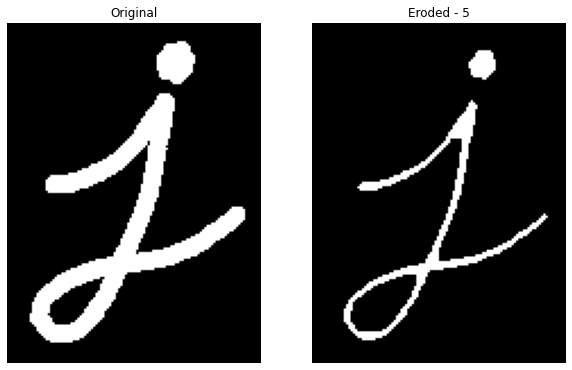

True

In [ ]:
erode_this(image_file=img_path, erosion_level=5, with_plot=True)

# Dilation with Library
Source: https://python.plainenglish.io/image-dilation-explained-easily-e085c47fbac2

In [ ]:
def dilate_lib(image_file, level=3, with_plot=True):
    level = 3 if level < 3 else level
    image_src = binarize_this(image_file=image_file)
    # library method
    image_dilated = cv.dilate(src=image_src, kernel=np.ones((level, level)), iterations=1)

    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Eroded - {}".format(level))

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_dilated, cmap=cmap_val)
        plt.show()
        return True
    return image_dilated

5. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

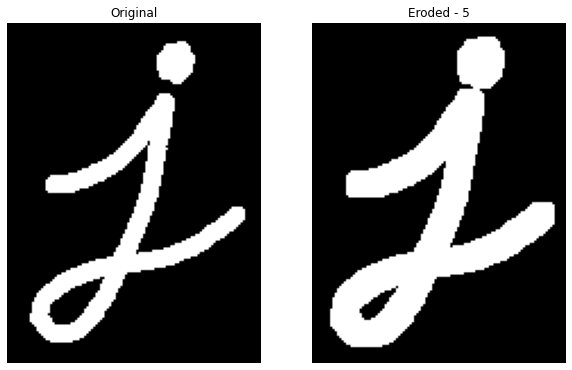

True

In [ ]:
dilate_lib(image_file=img_path, level=5, with_plot=True)

# Erosion with library
Source: https://python.plainenglish.io/image-erosion-explained-in-depth-using-numpy-320c01b674a8

In [ ]:
def erode_lib(image_file, level=3, with_plot=True):
    level = 3 if level < 3 else level
    image_src = binarize_this(image_file=image_file)
    # library method
    image_eroded = cv.erode(src=image_src, kernel=np.ones((level, level)), iterations=1)

    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Eroded - {}".format(level))

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eroded, cmap=cmap_val)
        plt.show()
        return True
    return image_eroded

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

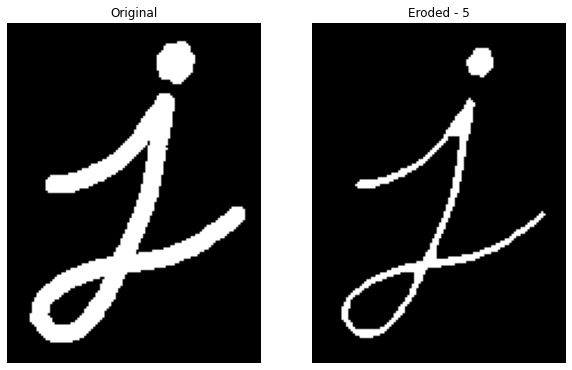

True

In [ ]:
erode_lib(image_file=img_path, level=5, with_plot=True)

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 7 x 7 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

A. Tanpa Library

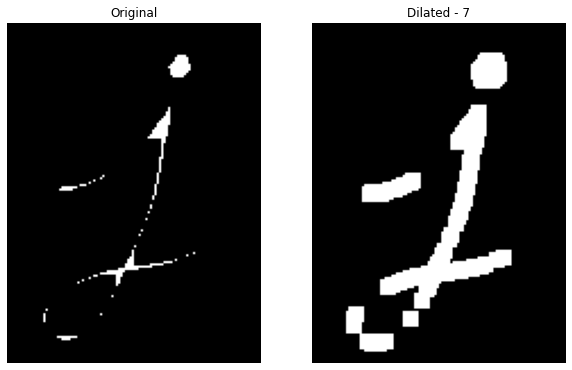

In [ ]:
# step 1 - erode the original image
eroded_img = erode_this(image_file=img_path, erosion_level=7, with_plot=False)

# step 2 - dilate the eroded image to create Opening
dilate_this(image_file=eroded_img, dilation_level=7, with_plot=True)

B. Dengan Library

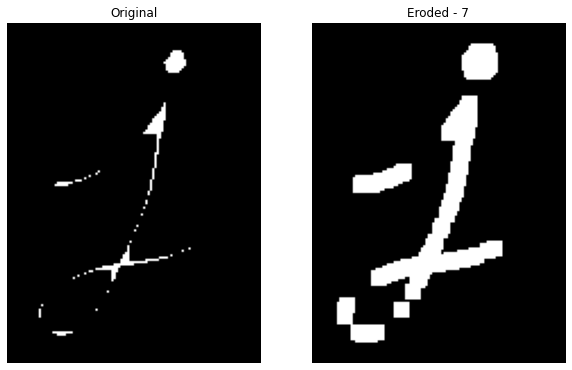

True

In [ ]:
# step 1 - erode the original image
eroded_img = erode_lib(image_file=img_path, level=7, with_plot=False)

# step 2 - dilate the eroded image to create Opening
dilate_lib(image_file=eroded_img, level=7, with_plot=True)

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 7 x 7 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

A. Tanpa Library

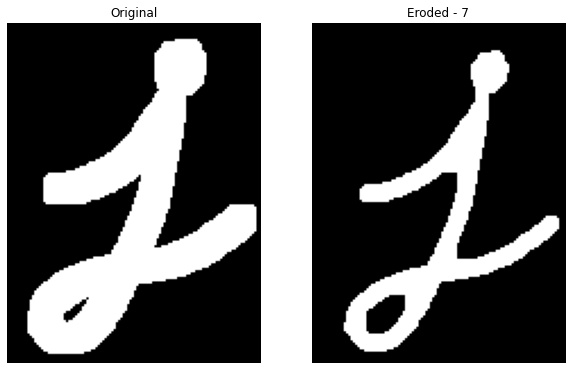

True

In [ ]:
# step 1 - dilate the original image
dilated_img = dilate_this(image_file=img_path, dilation_level=7, with_plot=False)

# step 2 - erode the eroded image to create Closing
erode_this(image_file=dilated_img, erosion_level=7, with_plot=True)

B. Dengan Library

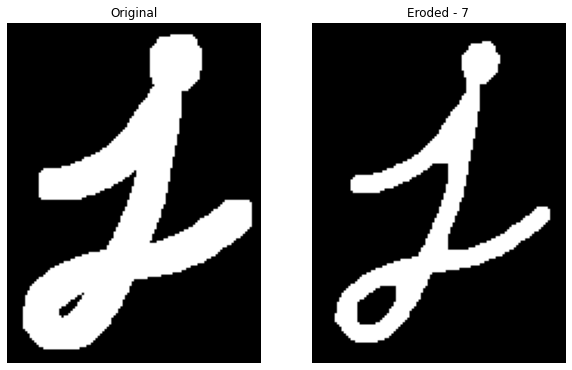

True

In [ ]:
# step 1 - dilate the original image
dilated_img = dilate_lib(image_file=img_path, level=7, with_plot=False)

# step 2 - erode the eroded image to create Closing
erode_lib(image_file=dilated_img, level=7, with_plot=True)